# Gather Data 

# Project Rubric
https://review.udacity.com/#!/rubrics/1136/view
### Steps 
* gather all data 
* store the content if necessary in a file 
* read in the file and create a pandas data frame
* test and access the files quickly

Acceptance Criterion
Assessing Data for this Project

* Detect and document at least eight (8) quality issues
Two (2) tidiness issues in your wrangle_act.ipynb Jupyter Notebook.
Cleaning Data for this Project

* Clean each of the issues you documented while assessing.
The result should be a high quality and tidy master pandas DataFrame (or DataFrames, if appropriate).
Storing, Analyzing, and Visualizing Data for this Project

* Store the clean DataFrame(s) in a CSV file with the main one named twitter_archive_master.csv.
If additional files exist because multiple tables are required for tidiness, name these files appropriately.
Additionally, you may store the cleaned data in a SQLite database (which is to be submitted as well if you do).
Analyze and visualize your wrangled data.

* At least three (3) insights and
one (1) visualization must be produced
Reporting for this Project

* Create a 300-600 word written report called wrangle_report.pdf or wrangle_report.html that briefly describes your wrangling efforts. This is to be framed as an internal document.

* Create a 250-word-minimum written report called act_report.pdf or act_report.html that communicates the insights and displays the visualization(s) produced from your wrangled data. This is to be framed as an external document, like a blog post or magazine article, for example.

In [2]:
# get all necessary libaries 
import pandas as pd
import numpy as np
import requests
import os
import json
import time
import re
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

%matplotlib inline

## Gather data step 1 - Download and read in the WeRateDogs Twitter archive data

In [3]:
# load the provided enhanced twitter archive file into a DataFrame
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

## Gather data step 2 - download and read in the neural network preditction for the breed of each posted dog 

The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

In [4]:
# Make directory if it doesn't already exist
folder_name = 'predictionData'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [5]:
# define the url for the prediction data per tweet 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

In [6]:
# read in the image prediction of the neural net
# i.e. what breed of dog or other object, animal, etc.) is present in each tweet according
# downloading it from the udacity server using the request libary

requested_tsv_file = requests.get(url)
#requested_tsv_file.text 
with open(os.path.join(folder_name,url.split('/')[-1]), mode = 'wb') as file:
        file.write(requested_tsv_file.content)

In [6]:
# store the .tsv file into a data frame 
# read image predictions file into a DataFrame
df_predictions = pd.read_csv('predictionData/image-predictions.tsv', sep = '\\t', engine = 'python')

In [7]:
# read each json object line by line from the tweet-json.txt
# and put it in a dataframe called tweet JSON
# source is https://knowledge.udacity.com/questions/150058 after lots of other possible implementations 
selected_attr = []
with open('tweet-json.txt', 'r') as json_file:
    for line in json_file:
        json_data = json.loads(line)
        selected_attr.append({'tweet_id': json_data['id'],
                             'favorites': json_data['favorite_count'],
                             'retweets': json_data['retweet_count']})
tweet_json = pd.DataFrame(selected_attr, columns=['tweet_id','favorite_count','retweet_count'])

In [8]:
# To the reviewer - what python implementation would you prefer to use for furture?
twitter_df = pd.read_json('tweet-json.txt', encoding='utf-8', lines=True)
# extract the json data 'id' from the json object and make it the index 
twitter_df.set_index('id', inplace=True)
# Select the ones you want
df_twitter_data = twitter_df[['favorite_count','retweet_count']]
# make the index to a id columns
df_twitter_data.reset_index(inplace =True )
# raname id to tweet_id for sake of completeness
df_twitter_data.columns = ['tweet_id','favorite_count','retweet_count']

# Accessing 

Get a sense of the three different data sources for and identify the possible cleanign steps for :
* df_twitter_archive
* df_twitter_data
* df_predictions



## twitter archive 

In [9]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
df_twitter_archive.head()


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [11]:
df_twitter_archive.tail()


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [12]:
df_twitter_archive.describe()


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [13]:
# total missing values for each features
twitter_archive.isnull().sum()

NameError: name 'twitter_archive' is not defined

In [14]:
# 10 is the standard rating_denominator
df_twitter_archive.rating_denominator.value_counts()


10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [15]:
# extreme values like 451 are to investigate further
df_twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

## image prediction

In [16]:
df_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [17]:
df_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [18]:
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
df_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


## tweet data

In [20]:
df_twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [21]:
df_twitter_data.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [22]:
df_twitter_data.tail()

,tweet_id,favorite_count,retweet_count
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48
2353,666020888022790149,2535,532


In [23]:
df_twitter_data.describe()

,tweet_id,favorite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


# Cleaning Plan Summary

## General
For the cleaning we prepare the data sets following the best prectices which are:
	
	1. Find Completeness Issues 
		a. Find the missing data, create it and then concatenate, join or input. Sometimes one can't find it. 
	2. Cleaning for tidiness is usually the second step. Tidy data is easy to manipulate and so this should be done first.
		a. First Structural issues 
		b. Then quality issues 
	3. Quality issues 
		a. Everything remaining :-)

### Quality Issues - missing data 

1.  Missing values in "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp". These columns are not needed for this project and sow e can delete them.

2.  Tweet ID 810984652412424192 has no rating

3. Missing data in name and stages columns showing as 'None'

4.  "expanded_urls" has few missing values and these records have no images. Should not be considered.

### Tidiness Issues

1. Dog "stage" variable in four columns: doggo, floofer, pupper, puppo
2. The columns'names are not clear and straightforward such as p1,p2.
3. Join 'tweet_info' and 'image_predictions' to 'twitter_archive'

### Remaining quality issues - not missing data
5.  The datatype of "timestamp" is not correct.

6. "rating_denominator" is 10, but it shows other numbers. That can lead misparse.

7. The "rating_numerator" also has some incorrect values.

8. Incorrect dog names

9. The dog names are sometimes first letter capital but sometimes not. Keep the name format consistent.
10. Source is hard to read and makes it difficult for further anaysis 

# Cleaning Data 

In [24]:
# create copies of each data set for cleaning 
df_predictions_clean = df_predictions.copy()
df_twitter_archive_clean = df_twitter_archive.copy()
df_twitter_data_clean = df_twitter_data.copy()

#### Quality issues - start with missing data 
Quality issue 1: retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id', 'in_reply_to_user_id have a lot of missing values.

Define: We drop all unnecessary columns.

*code*

In [25]:
# drop the columns unnecessary and contain huge amount of missing data
columns_drop = ['retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id',
               'in_reply_to_user_id', 'in_reply_to_user_id','retweeted_status_id']

df_twitter_archive_clean = df_twitter_archive_clean.drop(columns_drop, axis = 1)

*test*

In [26]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: int64(3), object(9)
memory usage: 221.0+ KB


Quality issue 2: Tweet ID 810984652412424192 has no rating

Define: Drop this tweet ID since it is onyl one and so has no relevance

*code*

In [27]:
df_twitter_archive_clean = df_twitter_archive_clean[df_twitter_archive_clean.tweet_id != 810984652412424192]


*test*

In [28]:
df_twitter_archive_clean[df_twitter_archive_clean.tweet_id == 810984652412424192]


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


Quality issue 3: Missing data in name column showing as 'None'
Define: Change missing values in 'name' from 'None' to NaN

*code*

In [29]:
df_twitter_archive_clean['name'] = df_twitter_archive_clean['name'].replace('None', np.NaN)


*test*

In [30]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2355 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2355 non-null int64
timestamp             2355 non-null object
source                2355 non-null object
text                  2355 non-null object
expanded_urls         2296 non-null object
rating_numerator      2355 non-null int64
rating_denominator    2355 non-null int64
name                  1610 non-null object
doggo                 2355 non-null object
floofer               2355 non-null object
pupper                2355 non-null object
puppo                 2355 non-null object
dtypes: int64(3), object(9)
memory usage: 239.2+ KB


Quality issue 4: "expanded_urls" has few missing values and these records have no images. Should not be considered.

Define: Remove this data without images

*code*

In [31]:
df_twitter_archive_clean.expanded_urls.isnull().sum()


59

In [32]:
# remove the 59 data points 
df_twitter_archive_clean = df_twitter_archive_clean.dropna(subset = ['expanded_urls'])


In [33]:
# sum shall be 0
df_twitter_archive_clean.expanded_urls.isnull().sum()


0

#### Tidiness Issues
After processed the quality issue for missing data, the tidiness issues needs to be handled second if we wanna follow the "best practices" suggested in the lessons

Tidiness Issues
1. Dog "stage" variable in four columns: doggo, floofer, pupper, puppo
2. Three prediction columns p1,p2,p3 
3. Join 'tweet_data' and 'breed_predictions' to 'twitter_archive'

Tidiness issue 1: Dog "stage" variable in four columns: doggo, floofer, pupper, puppo

Define: Drop individual dog stage columns and insert a new generic dog stage column 

*code*

In [34]:
# Create 'dog_stage' column which is made by extracting the dog stage variables from the text column when available 
df_twitter_archive_clean['stage_life'] = df_twitter_archive_clean['text'].str.extract('(puppo|pupper|floofer|doggo)', expand = True)

# create list to drop and drop doggo floofer pupper puppo
columns = ['puppo', 'floofer', 'doggo', 'pupper']
df_twitter_archive_clean = df_twitter_archive_clean.drop(columns, axis = 1)

*test*

In [35]:
# only one column called stage_life - not specified stage löifes are Nan
df_twitter_archive_clean.head(20)


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage_life
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,NaN
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,NaN
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo


Tidiness Issue 2: Three prediction columns p1,p2,p3 
Define: Combine all the prediciton columns into one columns that keeps all the true predictions. Fals declared predictions will get stored as NaN. 


*code*

In [36]:
# Following this approach posted here https://knowledge.udacity.com/questions/167012. Adapt it in terms of implementation to avoid fro loop using build in methods like apply. 

# store the true predictions and associated confidence. Write false predicitons as NaN. 
dog_prediction = []
pred_confidence = []

def get_prediction_confidence(dataframe):
    if dataframe['p1_dog'] == True:
        dog_prediction.append(dataframe['p1'])
        pred_confidence.append(dataframe['p1_conf'])
    elif dataframe['p2_dog'] == True:
        dog_prediction.append(dataframe['p2'])
        pred_confidence.append(dataframe['p2_conf'])
    elif dataframe['p3_dog'] == True:
        dog_prediction.append(dataframe['p3'])
        pred_confidence.append(dataframe['p3_conf'])
    else:
        dog_prediction.append('NaN')
        pred_confidence.append(0)

df_predictions_clean.apply(get_prediction_confidence, axis=1)
df_predictions_clean['dog_prediction'] = dog_prediction
df_predictions_clean['pred_confidence'] = pred_confidence

In [37]:
# drop merged single columns 
df_predictions_clean = df_predictions_clean.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], 1)

*test*

In [38]:
# 2 new columns added - not required columns don't exist 
df_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
tweet_id           2075 non-null int64
jpg_url            2075 non-null object
dog_prediction     2075 non-null object
pred_confidence    2075 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 64.9+ KB


Tininess Issue 3: Join 'tweet_data' and 'breed_predictions' to 'twitter_archive'

Define: 

In [39]:
df_twitter_archive_clean = pd.merge(left=df_twitter_archive_clean,
                                 right=df_twitter_data_clean, left_on='tweet_id', right_on='tweet_id', how='inner')



In [40]:
df_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
tweet_id           2075 non-null int64
jpg_url            2075 non-null object
dog_prediction     2075 non-null object
pred_confidence    2075 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 64.9+ KB


In [41]:
df_twitter_archive_clean = df_twitter_archive_clean.merge(df_predictions_clean, on='tweet_id', how='inner')

*test*

In [42]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2072 entries, 0 to 2071
Data columns (total 14 columns):
tweet_id              2072 non-null int64
timestamp             2072 non-null object
source                2072 non-null object
text                  2072 non-null object
expanded_urls         2072 non-null object
rating_numerator      2072 non-null int64
rating_denominator    2072 non-null int64
name                  1495 non-null object
stage_life            337 non-null object
favorite_count        2072 non-null int64
retweet_count         2072 non-null int64
jpg_url               2072 non-null object
dog_prediction        2072 non-null object
pred_confidence       2072 non-null float64
dtypes: float64(1), int64(5), object(8)
memory usage: 242.8+ KB


## Fix Remeining quality issues using the new combined data frame

5. The datatype of "timestamp" is not correct.

6. "rating_denominator" is 10, but it shows other numbers. That can lead misparse.

7. The "rating_numerator" also has some incorrect values.

8. Incorrect dog names

9. The dog names are sometimes first letter capital but sometimes not. Keep the name format consistent.

Quality issue 5: The datatype of "timestamp" is not correct.

Define: Change datatype to datetime

*code*

In [43]:
df_twitter_archive_clean['timestamp'] = pd.to_datetime(df_twitter_archive_clean['timestamp'])

*test*

In [44]:
# check for year-m-d h:min:s
df_twitter_archive_clean['timestamp'].head(3)

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
Name: timestamp, dtype: datetime64[ns]

Quality issue 6:"rating_denominator" is 10, but it shows other numbers. That can lead misparse.

Define: Filter for wrong denumerators and replace them with 10 


In [45]:
# filter the wrong rating_denominator values

df_temp = df_twitter_archive_clean[df_twitter_archive_clean['rating_denominator'] != 10]

df_temp[['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
345,820690176645140481,The floofs have been released I repeat the flo...,84,70
733,758467244762497024,Why does this never happen at my front door......,165,150
875,740373189193256964,"After so many requests, this is Bretagne. She ...",9,11
923,731156023742988288,Say hello to this unbelievably well behaved sq...,204,170
966,722974582966214656,Happy 4/20 from the squad! 13/10 for all https...,4,20
1000,716439118184652801,This is Bluebert. He just saw that both #Final...,50,50
1021,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99...,99,90
1046,710658690886586372,Here's a brigade of puppers. All look very pre...,80,80
1064,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro...",45,50
1130,704054845121142784,Here is a whole flock of puppers. 60/50 I'll ...,60,50


In [46]:
# Replace them with 10 which have a higher denumerator then numerator.
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 740373189193256964, ['rating_denominator']] = 10
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 722974582966214656, ['rating_denominator']] = 10
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 716439118184652801, ['rating_denominator']] = 10
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 682962037429899265, ['rating_denominator']] = 10
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 666287406224695296, ['rating_denominator']] = 10

*test*

In [47]:
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 740373189193256964]


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage_life,favorite_count,retweet_count,jpg_url,dog_prediction,pred_confidence
875,740373189193256964,2016-06-08 02:41:38,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,9,10,NaN,NaN,20648,9220,https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg,golden_retriever,0.807644


Quality Issue 7: Correct the rating numerator

Define: Correct numerator base on text information 

*code*

In [48]:
# assign text based value for each respective tweet id reading through the tweet
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 740373189193256964, ['rating_numerator']] = 14
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 722974582966214656, ['rating_numerator']] = 13
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 716439118184652801, ['rating_numerator']] = 11
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 682962037429899265, ['rating_numerator']] = 10
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 666287406224695296, ['rating_numerator']] = 9

*test*

In [49]:
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 666287406224695296]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage_life,favorite_count,retweet_count,jpg_url,dog_prediction,pred_confidence
2051,666287406224695296,2015-11-16 16:11:11,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,9,10,an,NaN,152,71,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg,Maltese_dog,0.857531


Quality issue 8: Correct incorrect dog names
Define: Write Non for incorrect dog names such as a, the, an 

*code*

In [50]:
df_twitter_archive_clean['name'].value_counts().head(20)
# assuming names are note more often duplicated the 10.

a          55
Charlie    11
Oliver     10
Cooper     10
Lucy       10
Penny      10
Tucker     10
Bo          8
Sadie       8
Winston     8
Lola        8
Toby        7
an          7
Daisy       7
the         7
Dave        6
Bella       6
Koda        6
Rusty       6
Stanley     6
Name: name, dtype: int64

In [51]:
# replce the most frequent incorrect dog names like 'the' 'a' or 'an'
incorrect_list = ['an','a','the']
for i in incorrect_list:
        df_twitter_archive_clean['name'].replace(i, 'None', inplace=True) 

*test*

In [52]:
df_twitter_archive_clean['name'].value_counts().head(10)


None       69
Charlie    11
Oliver     10
Cooper     10
Lucy       10
Penny      10
Tucker     10
Lola        8
Bo          8
Sadie       8
Name: name, dtype: int64

Quality Issue 9: Dog Names are sometimes lower case
Define: Make all first letters to lower letters using str libary

*code*

In [53]:
df_twitter_archive_clean['name'].str.islower().sum()


31

In [54]:
df_twitter_archive_clean['name'] = df_twitter_archive_clean.name.str.capitalize()


*test*

In [55]:
df_twitter_archive_clean['name'].str.islower().sum()


0

Quality Issue 10: Source is hard to read and makes it difficult for further anaysis 
Define: Simplyfy the data by renaming the sources to their basic information like "Twitter for iPhone" etc.

*code*

In [56]:
# Since we can rememebr theat we have four sources for tweets it turns out that after crating the master data frame by mergin in the predictions that parts of the sources weren't part of the prediction table. By merging using the 'inner' method the tweet ID need to be intersect and obviously the complete 91 Vine - Make a Scene are not part of the prediction table. 
df_twitter_archive_clean['source'].value_counts()


<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2031
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       30
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [57]:

df_twitter_archive_clean['source'] =  df_twitter_archive_clean['source'].replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
                                                                           'Twitter Web Client')

df_twitter_archive_clean['source'] = df_twitter_archive_clean['source'].replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
                                                                          'Twitter for iphone')

df_twitter_archive_clean['source'] =  df_twitter_archive_clean['source'].replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>',
                                                                           'TweetDeck')

*test*

In [58]:
df_twitter_archive_clean['source'].value_counts()


Twitter for iphone    2031
Twitter Web Client      30
TweetDeck               11
Name: source, dtype: int64

# Store Data

In [59]:
df_twitter_archive_clean.to_csv('twitter_archive_master.csv', encoding='utf-8')

In [60]:
# Check read in file 
df_twitter_archive_clean = pd.read_csv('twitter_archive_master.csv')
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2072 entries, 0 to 2071
Data columns (total 15 columns):
Unnamed: 0            2072 non-null int64
tweet_id              2072 non-null int64
timestamp             2072 non-null object
source                2072 non-null object
text                  2072 non-null object
expanded_urls         2072 non-null object
rating_numerator      2072 non-null int64
rating_denominator    2072 non-null int64
name                  1495 non-null object
stage_life            337 non-null object
favorite_count        2072 non-null int64
retweet_count         2072 non-null int64
jpg_url               2072 non-null object
dog_prediction        1749 non-null object
pred_confidence       2072 non-null float64
dtypes: float64(1), int64(6), object(8)
memory usage: 242.9+ KB


In [61]:
df_twitter_archive_clean.head()

,Unnamed: 0,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage_life,favorite_count,retweet_count,jpg_url,dog_prediction,pred_confidence
0,0,892420643555336193,2017-08-01 16:23:56,Twitter for iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,39467,8853,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN,0.000000
1,1,892177421306343426,2017-08-01 00:17:27,Twitter for iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,33819,6514,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581
2,2,891815181378084864,2017-07-31 00:18:03,Twitter for iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,25461,4328,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012
3,3,891689557279858688,2017-07-30 15:58:51,Twitter for iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,42908,8964,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086
4,4,891327558926688256,2017-07-29 16:00:24,Twitter for iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,41048,9774,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712


# Analysis and Visualization

### Distribution of tweet source 

Twitter for iphone    2031
Twitter Web Client      30
TweetDeck               11
Name: source, dtype: int64


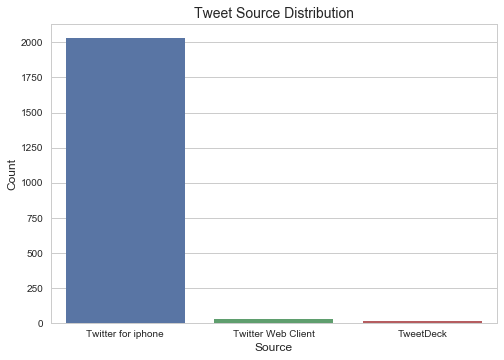

In [63]:

print(df_twitter_archive_clean['source'].value_counts())
sns.set(style="whitegrid")
sns.countplot(data = df_twitter_archive_clean, x = 'source')
#plt.xticks(rotation = 360)
plt.title('Tweet Source Distribution',fontsize=14)
plt.xlabel('Source', fontsize=12)
plt.ylabel('Count', fontsize=12)


The maturity source of tweets comes from iPhone twitter app. With 2031 counts in total. One can clearly say that the twitter app is the most important and used channel to tweet, retweet, post, and others. Twitter web client counts 30 and  TweetDesk shows 11 counts which is almost not worth to mention. 

### Dog Stage Distribution 

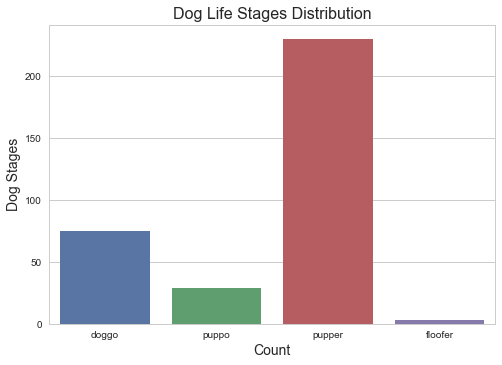

In [64]:
sns.set(style="whitegrid")
sns.countplot(data = df_twitter_archive_clean, x = 'stage_life', orient = 'h')
plt.xticks(rotation = 360)
plt.xlabel('Dog Stages', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Dog Life Stages Distribution',fontsize=16)

In [ ]:
Pupper’ (a doggo usually younger and often sweet :-)) is the signinifanct most popular dog life stage, followed by ‘doggo’ and ‘puppo’. Their is a possibility that young and unmatured dogs usually cuter than the adult dog and so they get posted more often by design. That does not mean we have lots of young dogs, it onyl means that young dogs get posted. Furthermore there’s huge amount missing data in dog stages. This leads to the assumption that the distribution does not reflect the reality and needs to be evaluated as a guess. 

### Most chosen name 

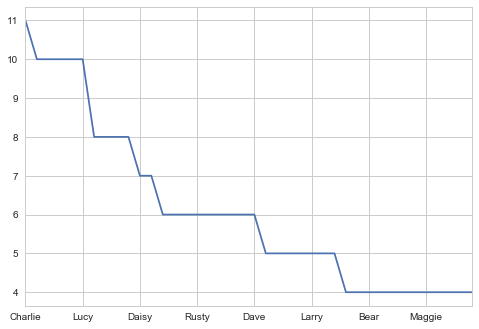

In [101]:
#df_twitter_archive_clean['name'].value_counts().he
df_test = df_twitter_archive_clean.query('name != "None"')
df_test['name'].value_counts().head(40).plot()

The top ten names consists the 69 none replacements. Except this none we have with * Charlie with 11 counts as the most popular dog name
* Rank 2,3,4,5,6 are shared with ten counts by Tucker, Lucy, Cooper, Penny, and Oliver
* Rank 7,8,9 are shared by Winston, Bo, and Lola

We can see additionally that the a huge number of dogs have unique names and only occure once within the more then 2000 tweets. 



In [ ]:
# Hint: this code would have been necessary when one is using the Twitter API. Since my account approval due to COVID-19 was in peding state I dcided to use the possibility offers in the prject discription page from udacity 
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive_enhanced.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)